In [107]:
#Import libraries

%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
import sklearn


In [108]:
#Load data
data = pd.read_csv('creditcard.csv')

In [109]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [110]:
predictors = data.columns.tolist()
# data[data.columns[2]][2]
predictors = [column for column in predictors if column not in ['Class']]
predictors

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [111]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [112]:
### Try to determine if there exists duplicate entries ###
# matches = []
# for j in range(len(data['V1'])- 1):
#     for i in range(len(data['V1']) - j ):
#         if data['V1'][j+i+1] == data['V1'][j]:
#             matches.append(data['V1'][j+i+1] )

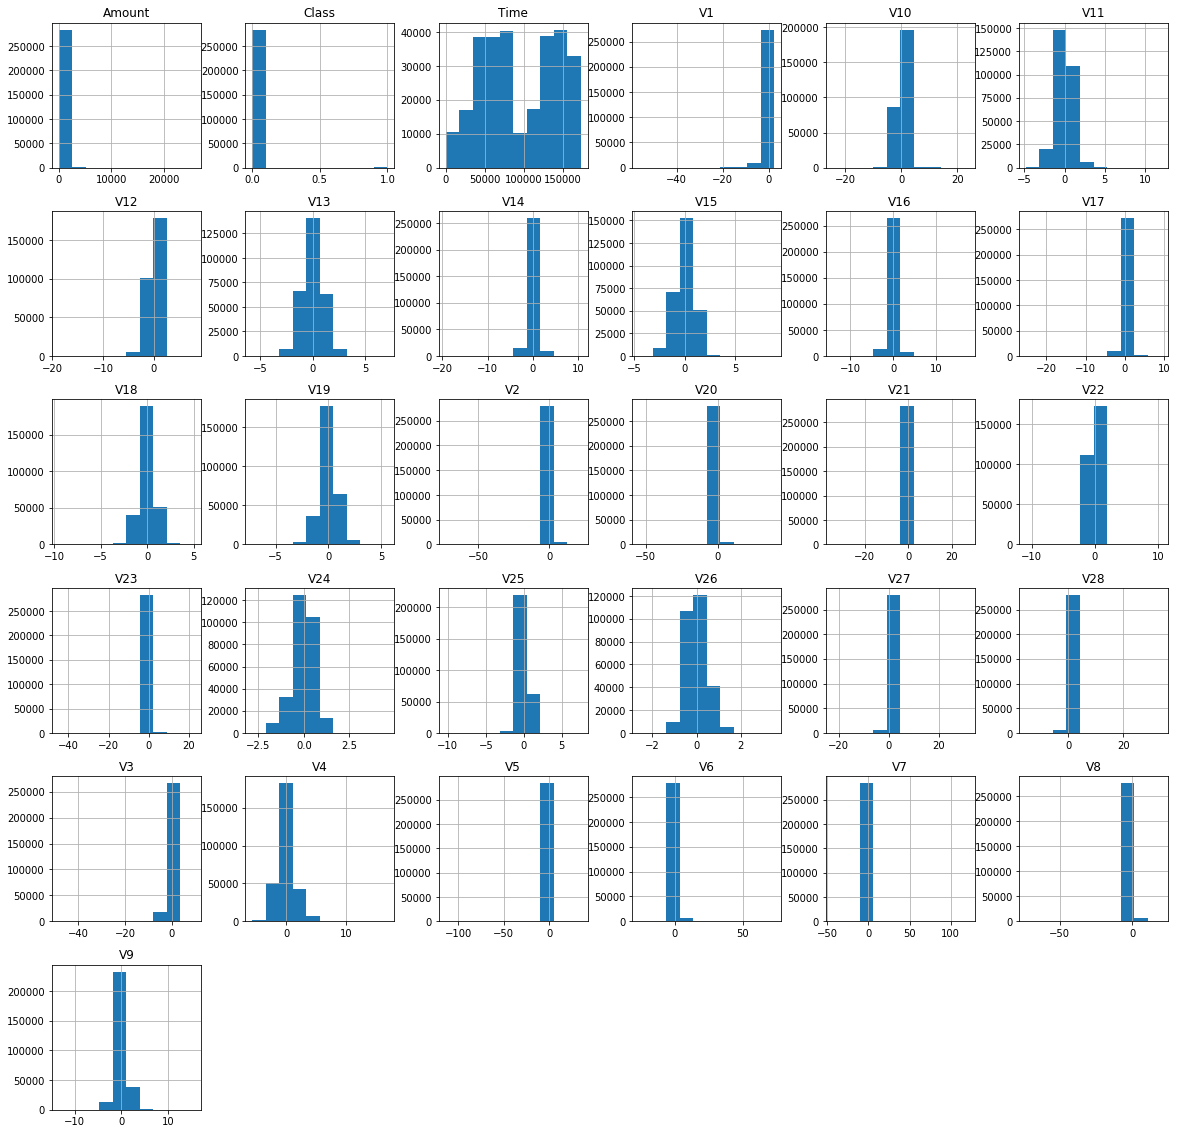

In [113]:
data.hist(figsize = (20,20))
plt.show()

In [114]:
valid = data[data['Class'] == 0]
fraudulant = data[data['Class'] == 1]

percent_fraud = len(fraudulant)/len(valid)
percent_fraud

0.0017304750013189597

In [115]:
valid.describe()['Amount']

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [116]:
fraudulant.describe()['Amount']

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [117]:
target = 'Class'
X = data[predictors]
y = data[target]

In [118]:
fraudulant.describe()['Time']

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [120]:
###############################
### Begin Linear Regression ###
###############################

lin_model = LinearRegression()
lin_model.fit(X,y)
score = lin_model.score(X,y)
print(f'R2 Score: {score}')

R2 Score: 0.5216390655775354


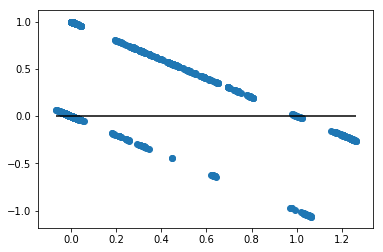

In [121]:
predictions = lin_model.predict(X)
plt.scatter(predictions, y - predictions)
plt.hlines(y=0, xmin = predictions.min(), xmax = predictions.max())
plt.show()

In [122]:

### End Linear Regression ###
#############################

In [123]:
#################
### New Model ###
#################
classifiers = {
    'Isolation Forest': IsolationForest(max_samples = len(X), contamination = percent_fraud),
    'Local Outlier Factor': LocalOutlierFactor( n_neighbors = 20, contamination = percent_fraud)
}
classifiers.items()

dict_items([('Isolation Forest', IsolationForest(bootstrap=False, contamination=0.0017304750013189597,
        max_features=1.0, max_samples=284807, n_estimators=100, n_jobs=1,
        random_state=None, verbose=0)), ('Local Outlier Factor', LocalOutlierFactor(algorithm='auto', contamination=0.0017304750013189597,
          leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1,
          n_neighbors=20, p=2))])

In [124]:
n_outliers = len(fraudulant)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == 'Local Outlier Factor':
        y_predict = clf.fit_predict(X)
        scores_predict = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_predict = clf.decision_function(X)
        y_predict = clf.predict(X)
    
    y_predict[y_predict == 1] = 0
    y_predict[y_predict == -1] = 1
    
    wrong_predictions = (y_predict != y).sum()
    
    print(f'Name: {clf_name}, Number of errors {wrong_predictions}')
    print(classification_report(y, y_predict))

Name: Isolation Forest, Number of errors 671
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.32      0.32      0.32       492

avg / total       1.00      1.00      1.00    284807

Name: Local Outlier Factor, Number of errors 935
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.05      0.05      0.05       492

avg / total       1.00      1.00      1.00    284807



In [125]:
#########################################
####  Modified Model  ###################

m_data = data.drop(columns = ['V5', 'V7', 'V20', 'V21', 'V23'] )
m_data.head()

,Time,V1,V2,V3,V4,V6,V8,V9,V10,V11,...,V18,V19,V22,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,0.462388,0.098698,0.363787,0.090794,-0.551600,...,0.025791,0.403993,0.277838,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,-0.082361,0.085102,-0.255425,-0.166974,1.612727,...,-0.183361,-0.145783,-0.638672,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,1.800499,0.247676,-1.514654,0.207643,0.624501,...,-0.121359,-2.261857,0.771679,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,1.247203,0.377436,-1.387024,-0.054952,-0.226487,...,1.965775,-1.232622,0.005274,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,0.095921,-0.270533,0.817739,0.753074,-0.822843,...,-0.038195,0.803487,0.798278,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [126]:
m_predictors = m_data.columns.tolist()
# data[data.columns[2]][2]
m_predictors = [column for column in m_predictors if column not in ['Class']]
m_predictors

target = 'Class'
X_m = m_data[m_predictors]
y_m = m_data[target]

In [127]:
valid_m = m_data[m_data['Class'] == 0]
fraudulant_m = m_data[m_data['Class'] == 1]
m_percent_fraud = len(fraudulant_m)/len(valid_m)
m_percent_fraud

0.0017304750013189597

In [128]:


classifiers = {
    'Isolation Forest': IsolationForest(max_samples = len(X_m), contamination = m_percent_fraud),
    'Local Outlier Factor': LocalOutlierFactor( n_neighbors = 20, contamination = m_percent_fraud)
}

In [129]:
n_outliers = len(fraudulant_m)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == 'Local Outlier Factor':
        y_predict_m = clf.fit_predict(X_m)
        scores_predict_m = clf.negative_outlier_factor_
    else:
        clf.fit(X_m)
        scores_predict_m = clf.decision_function(X_m)
        y_predict_m = clf.predict(X_m)
    
    y_predict_m[y_predict_m == 1] = 0
    y_predict_m[y_predict_m == -1] = 1
    
    wrong_predictions_m = (y_predict_m != y_m).sum()
    
    print(f'Name: {clf_name}, Number of errors {wrong_predictions_m}')
    print(classification_report(y_m, y_predict_m))

Name: Isolation Forest, Number of errors 599
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.39      0.39      0.39       492

avg / total       1.00      1.00      1.00    284807

Name: Local Outlier Factor, Number of errors 943
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.04      0.04      0.04       492

avg / total       1.00      1.00      1.00    284807



In [130]:
fraud_data = m_data[m_data['Class'] == 1]

fraud_data_stats = pd.DataFrame(fraud_data['Amount'])

In [131]:
fraud_data_stats.head()

,Amount
541,0.00
623,529.00
4920,239.93
6108,59.00
6329,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002540BBB3668>]],
      dtype=object)

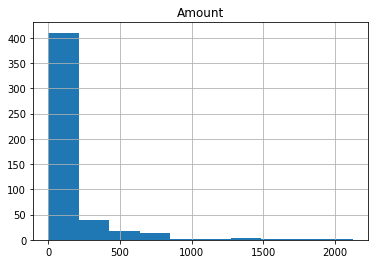

In [132]:
fraud_data_stats.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025405555F28>]],
      dtype=object)

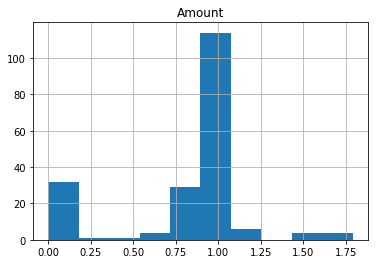

In [133]:
small_fraud = fraud_data_stats[fraud_data_stats['Amount'] <2]
small_fraud.hist()

In [134]:
V24_df = pd.merge(pd.DataFrame(m_data[m_data['Class'] == 1]) , pd.DataFrame(m_data['V24']))
len(V24_df)

556

In [135]:
pd.DataFrame(m_data['V24']).head()

,V24
0,0.066928
1,-0.339846
2,-0.689281
3,-1.175575
4,0.141267


<function matplotlib.pyplot.show(*args, **kw)>

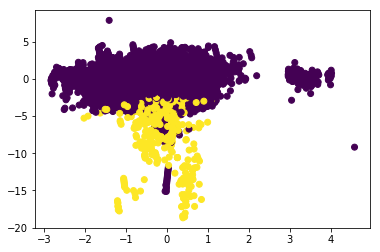

In [136]:

plt.scatter(m_data['V24'], m_data['V12'], c=m_data.Class)
plt.show